In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('~/Documents/M/pets/data/dataset.csv')

Набор данных HR. Задача состоит в том, чтобы проверить, **получил ли сотрудник повышение или нет**.  

Названия колонок:  
	•	`employee_id`  
	•	`department`  
	•	`region`  
	•	`education`  
	•	`gender`  
	•	`recruitment_channel`  
	•	`nooftrainings`  
	•	`age`  
	•	`previousyearrating`  
	•	`lengthofservice`  
	•	`KPIs_met >80%`  
	•	`awards_won?`  
	•	`avgtrainingscore`  
	•	`is_promoted`  

Если по названию колонки все еще не понятно, что в ней содержится, мы ожидаем, что вы сделаете свои предположения на основе анализа данных  

1. Провести анализ данных  
2. Построить и оценить модель классификации. Выбор метрик и моделей за вами. Решение должно быть загружено в формате .ipynb или .html  

Оценка работ будет производиться по следующим критериям:   

- Качественный EDA  
- Корректные и обоснованные трансформации данных  
- Корректное и обоснованное обучение и оценка модели  
- Качество кода и чистота jupyter notebook  

### Порядок действий: 
1. EDA: исследование столбцов и основных статистик
2. Уточнение значений столбцов
3. Обработка пропущенных значений
4. Обработка дублированных значений
5. Выделение признаков, обучение модели, оценка модели

### EDA

In [6]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [731]:
df.shape

(54808, 14)

In [732]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [733]:
df = df.rename(columns= {
    'KPIs_met >80%':'KPI',
    'awards_won?':'awards_won'
})

In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPI                   54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [735]:
df['is_promoted_inverted'] = 1 - df['is_promoted']


In [736]:
df.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,is_promoted_inverted
38657,26320,Sales & Marketing,region_2,NaN,f,sourcing,3,25,NaN,1,0,0,50,0,1
24499,12251,Operations,region_31,Master's & above,m,sourcing,1,41,4.0,2,1,0,56,0,1
5952,4075,Analytics,region_24,Bachelor's,m,sourcing,1,26,1.0,3,1,0,86,0,1
45089,68648,Sales & Marketing,region_29,NaN,m,sourcing,2,27,NaN,1,0,0,48,0,1
26156,66295,Analytics,region_2,Bachelor's,m,sourcing,1,48,5.0,15,0,0,88,0,1


In [737]:
df.select_dtypes(include=['float64', 'int64']).describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,is_promoted_inverted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,0.914830
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,1.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,1.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,1.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,1.000000


In [738]:
df.select_dtypes(include='object').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [739]:
df.duplicated().sum()

0

In [740]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPI                        0
awards_won                 0
avg_training_score         0
is_promoted                0
is_promoted_inverted       0
dtype: int64

In [741]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [742]:
df['education'].fillna('Unknown', inplace=True)

/var/folders/d7/hpxq4zpj3d1940lllvm4k6p00000gn/T/ipykernel_10545/2764629369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna('Unknown', inplace=True)


In [743]:
df.education.unique()

array(["Master's & above", "Bachelor's", 'Unknown', 'Below Secondary'],
      dtype=object)

In [744]:
df.query('is_promoted == 1') \
    .groupby('education') \
    .agg({'is_promoted':'count'}) \
    .reset_index() \
    .sort_values(by='is_promoted', ascending=False)

,education,is_promoted
0,Bachelor's,3008
2,Master's & above,1471
3,Unknown,122
1,Below Secondary,67


In [745]:
df.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [746]:
df.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [747]:
df.previous_year_rating.fillna(0, inplace=True)

/var/folders/d7/hpxq4zpj3d1940lllvm4k6p00000gn/T/ipykernel_10545/3973482196.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.previous_year_rating.fillna(0, inplace=True)


In [748]:
df.groupby('previous_year_rating') \
    .agg({'is_promoted':'count'})\
    .reset_index()\
    .sort_values(by="is_promoted",ascending=False)

,previous_year_rating,is_promoted
3,3.0,18618
5,5.0,11741
4,4.0,9877
1,1.0,6223
2,2.0,4225
0,0.0,4124


<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

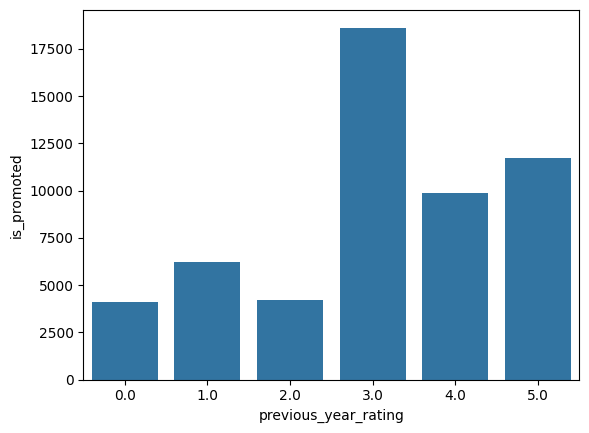

In [749]:
sns.barplot(data = df.groupby('previous_year_rating') \
                    .agg({'is_promoted':'count'})\
                    .reset_index()\
                    .sort_values(by="is_promoted",ascending=False), 
            x="previous_year_rating",
            y="is_promoted")

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPI'}>],
       [<Axes: title={'center': 'awards_won'}>,
        <Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>],
       [<Axes: title={'center': 'is_promoted_inverted'}>, <Axes: >,
        <Axes: >]], dtype=object)

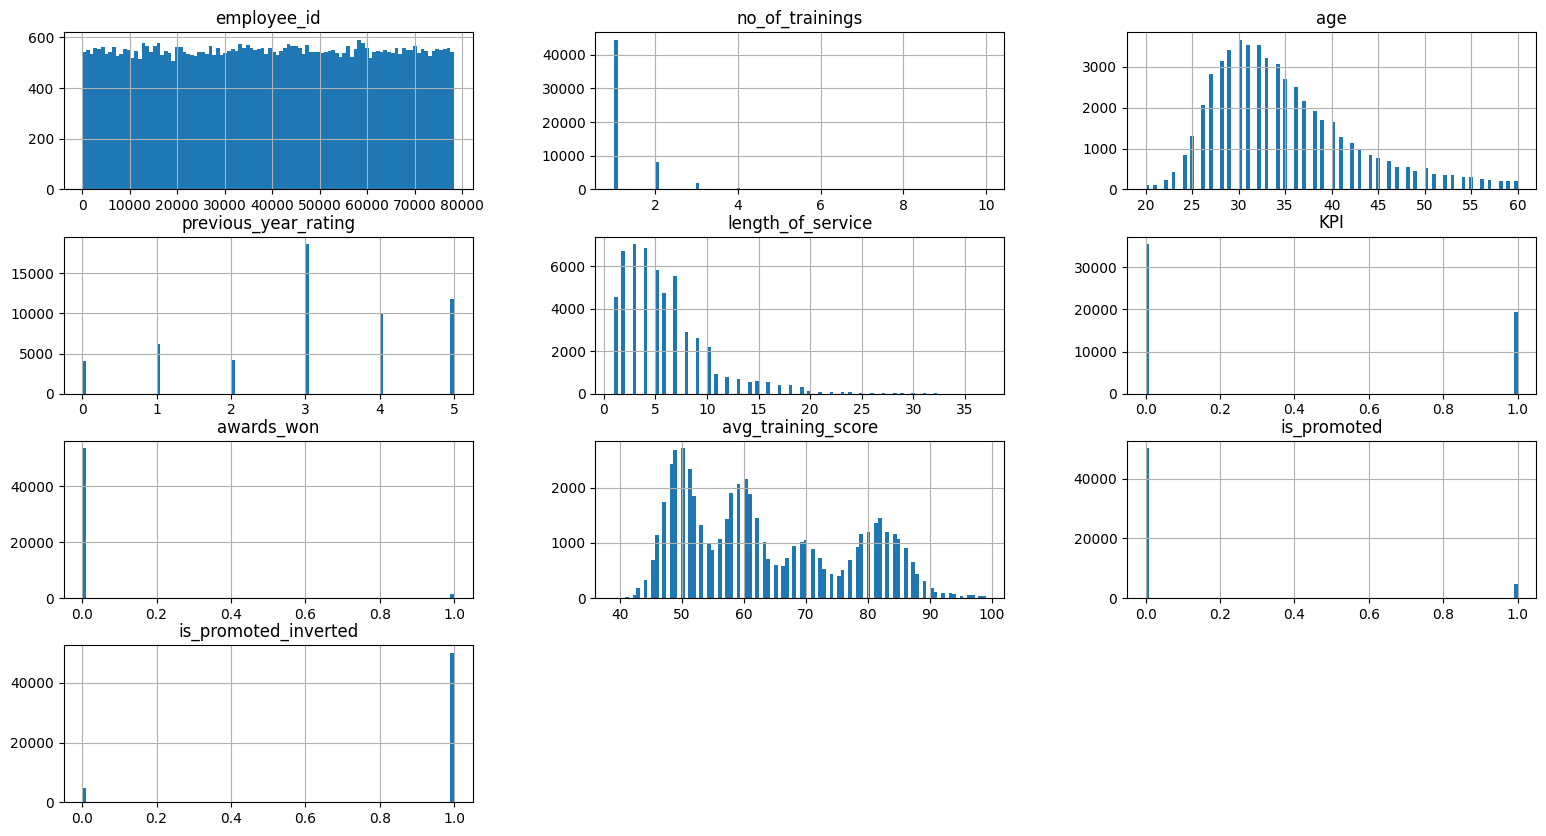

In [750]:
df[df.columns].hist(bins=100, figsize=(19,10))

# Уточнение данных: 

`employee_id`: идентификатор сотрудника  
`department`: отдел  
`region`: регион  
`education`: образование  
`gender`: пол  
`recruitment_channel`: из какого канала нанят  
`no_of_trainings`: количество тренингов (?)  
`age`: возраст  
`previous_year_rating`: рейтинг сотрудника за предыдущий год   
`length_of_service`: длительность работы (?)  
`KPIs_met >80%`: выполнение KPI сотрудника больше чем на 80%   
`awards_won?`: получал ли сотрудник награды  
`avg_training_score`: средний балл на тренингах (?)  
`is_promoted`: был ли сотрудник повышен   

По сути, `is_promoted` – наша искомая переменная, мы предсказываем, будет ли сотрудник повышен

In [751]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,is_promoted_inverted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1


<Axes: xlabel='age', ylabel='Count'>

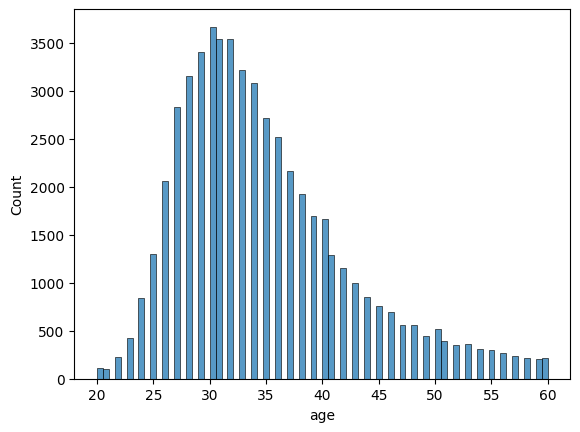

In [752]:
sns.histplot(df.age)

In [753]:
df.groupby(['gender','is_promoted']).agg({'employee_id':'count'}).reset_index()

,gender,is_promoted,employee_id
0,f,0,14845
1,f,1,1467
2,m,0,35295
3,m,1,3201


In [754]:
df.groupby('age').agg({'is_promoted':'count'}).reset_index().sort_values(by='is_promoted',ascending=False).head(10)

,age,is_promoted
10,30,3665
11,31,3534
12,32,3534
9,29,3405
13,33,3210
8,28,3147
14,34,3076
7,27,2827
15,35,2711
16,36,2517


<Axes: xlabel='age', ylabel='is_promoted'>

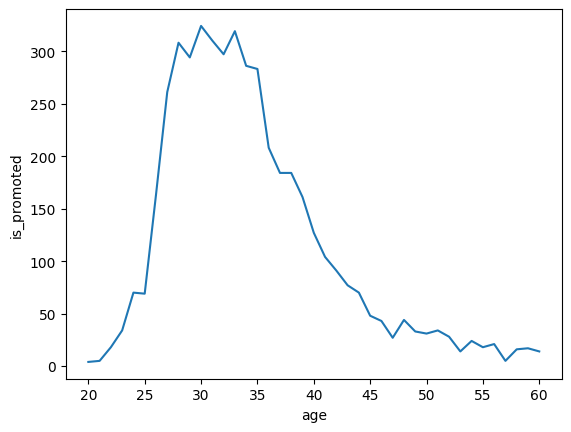

In [755]:
data=df.query("is_promoted == 1").groupby('age').agg({'is_promoted':'count'}).reset_index()
sns.lineplot(data=data, x="age", y="is_promoted")

In [756]:
department_count = df.groupby(['department']) \
        .agg({'employee_id':'count'}) \
        .reset_index()\
        .sort_values(by=['employee_id'], ascending=False)

department_count.rename(columns={'employee_id': 'total_employees'}, inplace=True)

In [757]:
department_count

,department,total_employees
7,Sales & Marketing,16840
4,Operations,11348
5,Procurement,7138
8,Technology,7138
0,Analytics,5352
1,Finance,2536
2,HR,2418
3,Legal,1039
6,R&D,999


In [758]:
promotion_count = df.groupby(['department', 'is_promoted']) \
        .agg({'employee_id':'count'}) \
        .reset_index()\
        .sort_values(by=['is_promoted','employee_id'], ascending=False)

promotion_count.rename(columns={'employee_id': 'count'}, inplace=True)

In [759]:
promotion_count

,department,is_promoted,count
15,Sales & Marketing,1,1213
9,Operations,1,1023
17,Technology,1,768
11,Procurement,1,688
1,Analytics,1,512
3,Finance,1,206
5,HR,1,136
13,R&D,1,69
7,Legal,1,53
14,Sales & Marketing,0,15627


In [760]:
promotion_pivot = promotion_count.pivot(index='department', columns='is_promoted', values='count')
promotion_pivot.columns = ['not_promoted', 'promoted']
promotion_pivot.reset_index(inplace=True)

In [761]:
department_promotion = pd.merge(department_count, promotion_pivot, on='department')

In [762]:
department_promotion['promoted_ratio'] = department_promotion['promoted'] / department_promotion['total_employees'] * 100
department_promotion['not_promoted_ratio'] = department_promotion['not_promoted'] / department_promotion['total_employees'] * 100

In [763]:
department_promotion.sort_values(by='promoted_ratio', ascending=False)

,department,total_employees,not_promoted,promoted,promoted_ratio,not_promoted_ratio
3,Technology,7138,6370,768,10.759316,89.240684
2,Procurement,7138,6450,688,9.638554,90.361446
4,Analytics,5352,4840,512,9.566517,90.433483
1,Operations,11348,10325,1023,9.014804,90.985196
5,Finance,2536,2330,206,8.123028,91.876972
0,Sales & Marketing,16840,15627,1213,7.203088,92.796912
8,R&D,999,930,69,6.906907,93.093093
6,HR,2418,2282,136,5.624483,94.375517
7,Legal,1039,986,53,5.101059,94.898941


In [764]:
df.groupby('region') \
    .agg({'is_promoted':'count'}) \
    .reset_index() \
    .sort_values(by='is_promoted', ascending=False).head(10)

,region,is_promoted
11,region_2,12343
14,region_22,6428
31,region_7,4843
6,region_15,2808
4,region_13,2648
18,region_26,2260
24,region_31,1935
28,region_4,1703
19,region_27,1659
7,region_16,1465


In [765]:
df.groupby('recruitment_channel').agg({'is_promoted':'count'}).reset_index()

,recruitment_channel,is_promoted
0,other,30446
1,referred,1142
2,sourcing,23220


<Axes: xlabel='recruitment_channel', ylabel='is_promoted'>

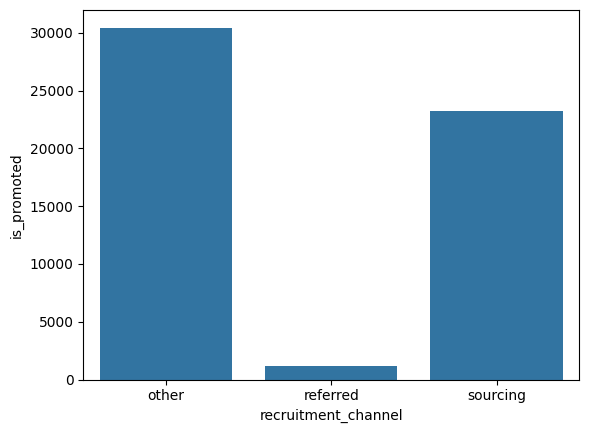

In [766]:
sns.barplot(data=df.groupby('recruitment_channel').agg({'is_promoted':'count'}).reset_index(),
            x="recruitment_channel",
            y="is_promoted")

In [767]:
df.groupby('KPI').agg({'is_promoted':'count'}).reset_index()

,KPI,is_promoted
0,0,35517
1,1,19291


In [768]:
df.groupby('awards_won').agg({'is_promoted':'count'}).reset_index()

,awards_won,is_promoted
0,0,53538
1,1,1270


In [769]:
df.corr(numeric_only=True)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,is_promoted_inverted
employee_id,1.000000,-0.005121,0.000437,0.002350,0.001274,-0.002501,0.008420,-0.000586,0.001206,-0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.064119,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.024896
age,0.000437,-0.081278,1.000000,0.177935,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,0.017166
previous_year_rating,0.002350,-0.064119,0.177935,1.000000,0.191163,0.274593,0.021475,0.058718,0.125991,-0.125991
length_of_service,0.001274,-0.057275,0.657111,0.191163,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,0.010670
KPI,-0.002501,-0.045576,-0.025592,0.274593,-0.077693,1.000000,0.097000,0.078391,0.221582,-0.221582
awards_won,0.008420,-0.007628,-0.008169,0.021475,-0.039927,0.097000,1.000000,0.072138,0.195871,-0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.058718,-0.038122,0.078391,0.072138,1.000000,0.181147,-0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.125991,-0.010670,0.221582,0.195871,0.181147,1.000000,-1.000000
is_promoted_inverted,-0.001206,0.024896,0.017166,-0.125991,0.010670,-0.221582,-0.195871,-0.181147,-1.000000,1.000000


Где-то здесь я запуталась в корреляциях и параметрах и получала очень низкие метрики
Зато если инвертировать is_promoted, 

In [770]:
df = pd.get_dummies(df, columns=['department','education','region', 'gender', 'recruitment_channel'], drop_first=True)

In [775]:
X = df.drop(['is_promoted', 'is_promoted_inverted'], axis=1)
y1 = df['is_promoted']
y2 = df['is_promoted_inverted']

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [774]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9327677431125707
Precision: 0.7898305084745763
Recall: 0.2566079295154185
F1-score: 0.3873649210307564
Confusion Matrix:
 [[9992   62]
 [ 675  233]]


In [776]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9327677431125707
Precision: 0.9367207274772663
Recall: 0.9938333001790333
F1-score: 0.9644322185222721
Confusion Matrix:
 [[ 233  675]
 [  62 9992]]
